In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Constantes 
UA = 149597870700  # Unidad Astronómica en metros
a = 1.5 * UA  # Semi-eje mayor en metros 
e = 0.4  # Excentricidad 
M_Sol = 1.989e30  # Masa del Sol
G = 6.674e-11  # Constante gravitacional (Nm^2/kg^2)
time = [i for i in range(0, 56764800 + 1, 2 * 24 * 60 ** 2)]  # Tiempo desde 0, hasta 1.8 años en
# segundos cada dos días.


In [4]:
def kepler(E, t):
    return E - e * np.sin(E) - t * (G * M_Sol / a ** 3) ** 0.5
    # Al solucionar la ecuación de kepler encontramos la anomalía excentrica.



def E(t):  # Defino la funcion otra vez para que me arroje su valor en un tiempo t
    a0 = -0.9
    b0 = 6.1  # Este intervalo sirve para ubicar el cero con cada t, ya que solo hay uno en cada caso

    Nmax = 1000  # Número máximo de iteraciones 
    Tol = 1.e-8  # Tolerancia, que no exeda el épsilon de la máquina
    error = 1.  # Error inicial
    i = 0  # iteracion 

    ai = a0
    bi = b0

    if kepler(a0, t) * kepler(b0, t) < 0:

        while error > Tol:
            p = (bi + ai) * .5
            p_prev = p
            if kepler(a0, t) * kepler(p, t) < 0:
                bi = p
                ai = ai
            elif kepler(b0, t) * kepler(p, t) < 0:
                ai = p
                bi = bi
            i += 1
            p = (bi + ai) * .5
            error = abs(p - p_prev)
            if i >= Nmax:
                print("Numero maximo de iteraciones excedido")
                break
        return p
    else:
        print("Intervalo inadecuado")


In [5]:
def r(f):  # radio r
    return a * (1 - e ** 2) / (1 + e * np.cos(f))
def f(E):  # Anomalia verdadera f
    return 2. * np.arctan(((1 + e) / (1 - e)) ** .5 * np.tan(E / 2.))

f_list = [f(E(i)) for i in time]  # Anomalia verdadera
r_list = [r(i) / UA for i in f_list]  # radio


In [6]:
x_list = [r_list[i] * np.cos(f_list[i]) for i in range(len(r_list))]
y_list = [r_list[i] * np.sin(f_list[i]) for i in range(len(r_list))]


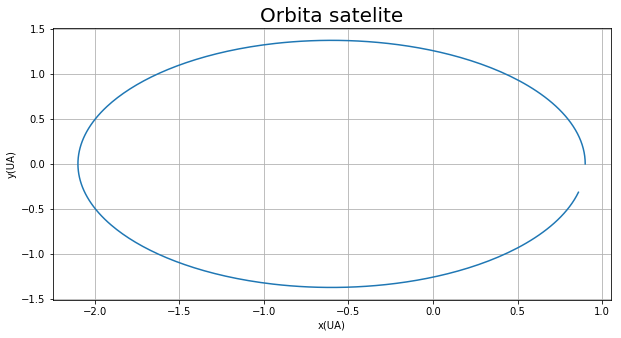

In [7]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.grid()
ax.plot(x_list, y_list)
plt.xlabel('x(UA)')
plt.ylabel('y(UA)')
plt.title('Orbita satelite', fontsize=20)
plt.show()
